In [1]:
import pandas as pd
import sqlite3
conn = sqlite3.connect('factbook.db')

In [2]:
q1 = "SELECT * FROM sqlite_master WHERE type='table';"
pd.read_sql_query(q1, conn)

,type,name,tbl_name,rootpage,sql
0,table,facts,facts,2,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."
1,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"


In [3]:
q2 = "select * from facts limit 5"
pd.read_sql_query(q2,conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51,2015-11-01 13:19:49.461734,2015-11-01 13:19:49.461734
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30,2015-11-01 13:19:54.431082,2015-11-01 13:19:54.431082
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92,2015-11-01 13:19:59.961286,2015-11-01 13:19:59.961286
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00,2015-11-01 13:20:03.659945,2015-11-01 13:20:03.659945
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46,2015-11-01 13:20:08.625072,2015-11-01 13:20:08.625072


## Here are the descriptions for some of the columns:

name - The name of the country.

area - The total land and sea area of the country.

population - The country's population.

population_growth- The country's population growth as a percentage.

birth_rate - The country's birth rate, or the number of births a year per 1,000 people.

death_rate - The country's death rate, or the number of death a year per 1,000 people.

area- The country's total area (both land and water).

area_land - The country's land area in square kilometers.

area_water - The country's waterarea in square kilometers.

Let's start by calculating some summary statistics and look for any outlier countries.

In [4]:
q_max_pop = "select max(population) as MAX_Population from facts"
pd.read_sql_query(q_max_pop,conn)

,MAX_Population
0,7256490011


In [5]:
q_min_pop = "select min(population) as Min_Population from facts"
pd.read_sql_query(q_min_pop,conn)

,Min_Population
0,0


In [6]:
q_min_pop_grow = "select min(population_growth) as Min_Population_growth from facts"
pd.read_sql_query(q_min_pop_grow,conn)

,Min_Population_growth
0,0.0


In [7]:
q_max_pop_grow = "select max(population_growth) as Min_Population_growth from facts"
pd.read_sql_query(q_max_pop_grow,conn)

,Min_Population_growth
0,4.02


In [8]:
query = "select * from facts where population == 0"
pd.read_sql_query(query,conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
0,250,ay,Antarctica,None,280000,None,0,None,None,None,None,2015-11-01 13:38:44.885746,2015-11-01 13:38:44.885746


In [9]:
query = "select name from facts where population == (select max(population) from facts)"
pd.read_sql_query(query,conn)

,name
0,World


In [10]:
#we can either do it in this way when we want all the columns:
q4 = '''
select *
from facts
where population == (select min(population) from facts)
'''
pd.read_sql_query(q4,conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
0,250,ay,Antarctica,None,280000,None,0,None,None,None,None,2015-11-01 13:38:44.885746,2015-11-01 13:38:44.885746


/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3296: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1d79c780>,
      dtype=object)

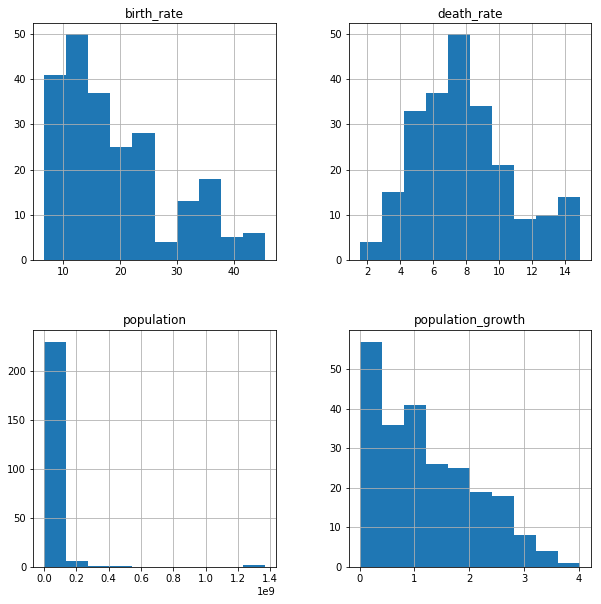

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

q7 = '''
select population,population_growth,birth_rate,death_rate
from facts
where (population !=((select min(population) from facts))) and (population !=((select max(population) from facts)))
'''
pd.read_sql_query(q7,conn).hist(ax=ax)

In [13]:
def run_query(query):
    return pd.read_sql_query(query,conn)

In [14]:
run_query("select * from facts limit 5")

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51,2015-11-01 13:19:49.461734,2015-11-01 13:19:49.461734
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30,2015-11-01 13:19:54.431082,2015-11-01 13:19:54.431082
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92,2015-11-01 13:19:59.961286,2015-11-01 13:19:59.961286
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00,2015-11-01 13:20:03.659945,2015-11-01 13:20:03.659945
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46,2015-11-01 13:20:08.625072,2015-11-01 13:20:08.625072


In [23]:
#population density of countries
query = '''
select name, CAST(population as float) / CAST(area_land as float) as 'density' from facts where density > 0.0 order by density desc limit 10;
'''
result_density = run_query(query)
result_density

,name,density
0,Macau,21168.964286
1,Monaco,15267.500000
2,Singapore,8259.784571
3,Hong Kong,6655.271202
4,Gaza Strip,5191.819444
5,Gibraltar,4876.333333
6,Bahrain,1771.859211
7,Maldives,1319.640940
8,Malta,1310.015823
9,Bermuda,1299.925926


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a1e5400b8>],
      dtype=object)

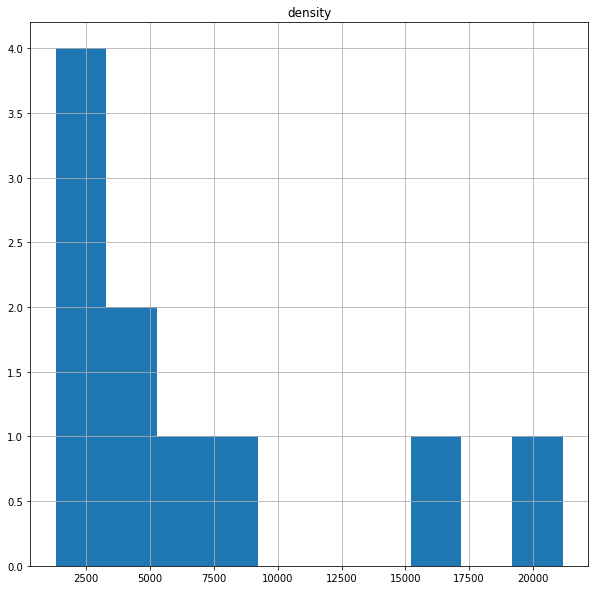

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
result_density.hist(ax = ax)

In [40]:
#Which countries have the highest ratios of water to land? 
query = '''
select name, (CAST(area_water as float) / ROUND(CAST(area_land as float),2) as 'water to land ratio'
from facts
where "water to land ratio" > 0
order by "water to land ratio" desc
limit 10;
'''
run_query(query)

,name,water to land ratio
0,British Indian Ocean Territory,905.666667
1,Virgin Islands,4.520231
2,Puerto Rico,0.554791
3,"Bahamas, The",0.386613
4,Guinea-Bissau,0.284673
5,Malawi,0.259396
6,Netherlands,0.225710
7,Uganda,0.222922
8,Eritrea,0.164356
9,Liberia,0.156240


In [38]:
#country with more water than land
query = '''
select name, ROUND(CAST(area_water as float),2) / ROUND(CAST(area_land as float),2) as 'water to land ratio'
from facts
where "water to land ratio" > 0.5
order by "water to land ratio" desc
limit 10;
'''
run_query(query)

,name,water to land ratio
0,British Indian Ocean Territory,905.666667
1,Virgin Islands,4.520231
2,Puerto Rico,0.554791
